In [1]:
from math import pi, log, sqrt
from scipy.integrate import odeint
from numpy import arange, zeros, linspace
from matplotlib.pylab import plot, scatter
from sympy import symbols, Eq, solve

In [2]:
#Equation of State
#     P = d^gamma
#P is pressure, d is density
#Returns the pressure based on the density

def eos(pressure):
  return pressure**0.5+pressure

In [3]:
#This returnd dP/dr and dm/dr based on input variables
#Vars is in the form of [density, mass], and a radius value

def tov(vars, radius):
  density = eos(vars[0])
  mass = vars[1]
  pres = vars[0]
  dPdr = -1*(((density+pres)*(mass+(4*pi*pres*radius**3)))/(radius*(radius-(2*mass))))
  dmdr = 4*pi*density*radius**2
  return dPdr, dmdr

In [4]:
#tovSolve uses a starting radius and a final radius and distributes posible radius values between them
#The odeint function is used to solve the TOV equations using the initial values for the pressure and mass
#Initial pressure is just the density run through the EoS
#Initial mass is the density times the volume ((4/3)*pi*r^3) where r is the starting radius
#Then, as long as the pressure is above 1, the star is considered to exist
#Once the pressure has dropped below that, the star has ended and that final mass and radius are returned, along with the pressure

def tovSolve(pressure):
  startingRadius =0.1
  finalRadius = 1500
  step = 0.1

  ans = odeint(tov, [pressure, 0],arange(startingRadius, finalRadius, step), printmessg=1)

  radii = arange(startingRadius, finalRadius, step)
  masses = ans[:,1]
  pressures = ans[:,0]

  count = 0
  mass = 0.0
  pressure = 0.0
  radius = startingRadius

  for i in pressures:
    if i > 1e-13*pressure:
      count += 1
      mass = masses[count]
      radius += step
  return radius, mass

In [5]:
#This function takes in the minimum and maximum density and the number of density wanted to be check
#Each density is then run through tovSolve, and the resulting values are saved in lists

def mass_radius(minimumDensity, maximumDensity, step):
  dens = zeros(step)
  mass = zeros(step)
  radius = zeros(step)
  pressure = zeros(step)
  for i in range(step):
    dens[i] = minimumDensity + (maximumDensity-minimumDensity)*i/step
    radius[i],mass[i] = tovSolve(dens[i])
    print(i)
  return radius, mass, dens

C:\Users\kalha\AppData\Local\Temp\ipykernel_18568\1444940559.py:7: RuntimeWarning: invalid value encountered in scalar power
  return pressure**0.5+pressure
C:\Users\kalha\AppData\Local\Temp\ipykernel_18568\1988427882.py:13: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  ans = odeint(tov, [pressure, 0],arange(startingRadius, finalRadius, step), printmessg=1)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


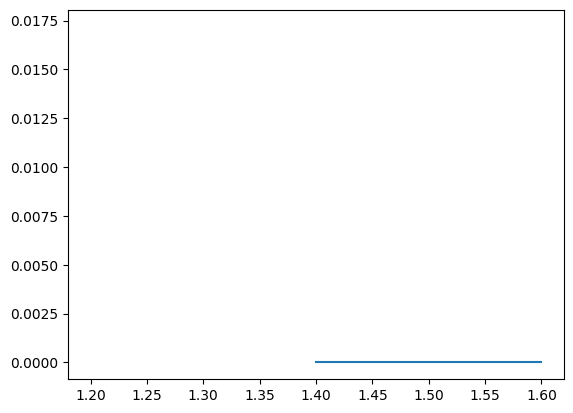

In [6]:
ans = mass_radius(5e-5, 150, 100)
plot(ans[0], ans[1])

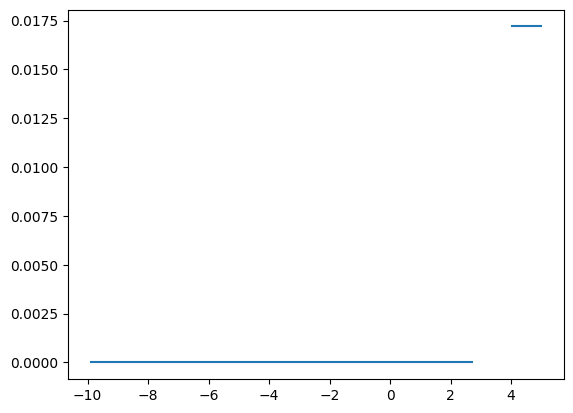

In [7]:
lndens = []
for i in range(len(ans[2])):
  lndens.append(log(ans[2][i]))

plot(lndens, ans[1])

C:\Users\kalha\AppData\Local\Temp\ipykernel_18568\4274604883.py:13: RuntimeWarning: invalid value encountered in scalar power
  return pressure**0.5+pressure
C:\Users\kalha\AppData\Local\Temp\ipykernel_18568\4274604883.py:38: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  ans = odeint(tov, [pressure, 0],arange(startingRadius, finalRadius, step), printmessg=1)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


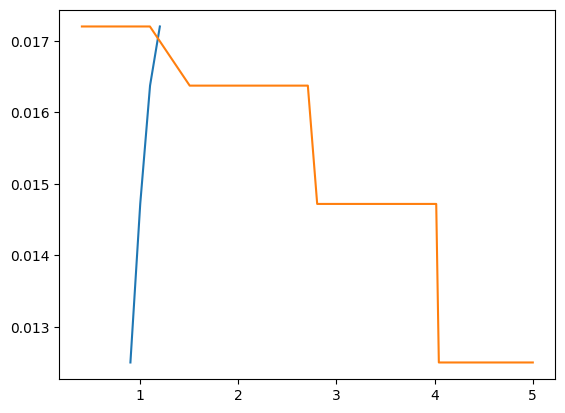

In [8]:
from math import pi, log, sqrt
from scipy.integrate import odeint
from numpy import arange, zeros, linspace
from matplotlib.pylab import plot, scatter
from sympy import symbols, Eq, solve

#Equation of State
#     P = d^gamma
#P is pressure, d is density
#Returns the pressure based on the density

def eos(pressure):
  return pressure**0.5+pressure

#This returnd dP/dr and dm/dr based on input variables
#Vars is in the form of [density, mass], and a radius value

def tov(vars, radius):
  density = eos(vars[0])
  mass = vars[1]
  pres = vars[0]
  dPdr = -1*(((density+pres)*(mass+(4*pi*pres*radius**3)))/(radius*(radius-(2*mass))))
  dmdr = 4*pi*density*radius**2
  return dPdr, dmdr

#tovSolve uses a starting radius and a final radius and distributes posible radius values between them
#The odeint function is used to solve the TOV equations using the initial values for the pressure and mass
#Initial pressure is just the density run through the EoS
#Initial mass is the density times the volume ((4/3)*pi*r^3) where r is the starting radius
#Then, as long as the pressure is above 1, the star is considered to exist
#Once the pressure has dropped below that, the star has ended and that final mass and radius are returned, along with the pressure

def tovSolve(pressure):
  startingRadius =0.1
  finalRadius = 1500
  step = 0.1

  ans = odeint(tov, [pressure, 0],arange(startingRadius, finalRadius, step), printmessg=1)

  radii = arange(startingRadius, finalRadius, step)
  masses = ans[:,1]
  pressures = ans[:,0]

  count = 0
  mass = 0.0
  pressure = 0.0
  radius = startingRadius

  for i in pressures:
    if i > 1e-13*pressure:
      count += 1
      mass = masses[count]
      radius += step
  return radius, mass

#This function takes in the minimum and maximum density and the number of density wanted to be check
#Each density is then run through tovSolve, and the resulting values are saved in lists

def mass_radius(minimumDensity, maximumDensity, step):
  dens = zeros(step)
  mass = zeros(step)
  radius = zeros(step)
  pressure = zeros(step)
  for i in range(step):
    dens[i] = minimumDensity + (maximumDensity-minimumDensity)*i/step
    radius[i],mass[i] = tovSolve(dens[i])
    print(i)
  return radius, mass, dens

ans = mass_radius(5e-5, 150, 100)
plot(ans[0], ans[1])

lndens = []
for i in range(len(ans[2])):
  lndens.append(log(ans[2][i]))

plot(lndens, ans[1])